[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bqpro1/neural-network-xor/blob/main/simple_NN.ipynb)

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Clone the repository to access the media files
    !git clone https://github.com/bqpro1/neural-network-xor.git
    !mv neural-network-xor/media .
    !rm -rf neural-network-xor

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

## **Pojęcia**
- **Sieć neuronowa** - złożona funkcja matematyczna, która przetwarza dane wejściowe w dane wyjściowe $ŷ = f^\prime(x;⦦;\theta)$, gdzie $x$ to dane wejściowe, $ŷ$ to dane wyjściowe, a $f^\prime$ to funkcja przetwarzania danych, $⦦$ to aktywacja, a $θ$ to parametry.
- **Uczenie głębokie** - jest to proces uczenia się przez sieć neuronową, gdzie sieć może mieć wiele warstw ukrytych.
- **Parametry** - są to wagi w modelu.
- **Bias** - jest to wartość dodawana do sumy ważonej wejścia.
- **Funkcja aktywacji** - jest to funkcja, która przetwarza sumę ważoną wejścia i dodaje do niej bias.
- **Macierz wag** - jest to macierz, która przechowuje wagi między neuronami.

### **Zależność pomiędzy grafem a macierzą**
![Prosta sieć z 2 warstwami ukrytymi](media/Graph2matrix.png)
![matrix](media/matrix.png)

### **Prosta sieć z 2 warstwami ukrytymi**
### **Uczenie głębokie**
![Prosta sieć z 2 warstwami ukrytymi](media/Neural%20NetworkB.png)

In [3]:
# scalar
# wektor
# macierz
# tensor

#### **XOR; albo, albo; alternatywa wykluczająca**
| $p$ | $q$ | $p \oplus q$ |
|-----|-----|-------------|
| True | True | False |
| True | False | True |
| False | True | True |
| False | False | False |

#### **LUB; alternatywa**
| $p$ | $q$ | $p \vee q$ |
|-----|-----|-----------|
| True | True | True |
| True | False | True |
| False | True | True |
| False | False | False |

#### **I, koniunkcja**
| $p$ | $q$ | $p \wedge  q$ |
|-----|-----|-------------|
| True | True | True |
| True | False | False |
| False | True | False |
| False | False | False |

### Wielowarstwowy perceptron (MLP - multi-layer perceptron)

In [21]:
# Zdefiniowanie modelu
class MLP(nn.Module):
    
    def __init__(self):
        super(MLP, self).__init__()
        self.W1 = nn.Linear(2, 4) # 2 wejścia, 4 neurony w warstwie ukrytej W1
        self.W2 = nn.Linear(4, 2) # 4 neurony w warstwie ukrytej W1, 2 neurony w warstwie ukrytej W2
        self.W3 = nn.Linear(2, 1) # 2 neurony w warstwie ukrytej W2, 1 wyjście
        

    def forward(self, x):
        x = F.relu(self.W1(x)) # relu 
        x = F.relu(self.W2(x)) # relu
        x = F.sigmoid(self.W3(x)) # sigmoid
        return x

In [38]:
# XOR
xor_model = MLP()
print(xor_model)

X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32) # wejścia/ dane treningowe
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32) # wyjścia/ etykiety

# Tworzenie obiektu TensorDataset
dataset = TensorDataset(X, y)

# Tworzenie obiektu DataLoader, deklaracja batch_size oraz shuffle
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

loss_function = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(xor_model.parameters(), lr=0.001, momentum=0.9)

MLP(
  (W1): Linear(in_features=2, out_features=4, bias=True)
  (W2): Linear(in_features=4, out_features=2, bias=True)
  (W3): Linear(in_features=2, out_features=1, bias=True)
)


In [42]:
# To są wagi w macierzy W2, nazywane również parametrami.
# W2 jest wymiaru (4, 2), ponieważ mamy 4 neurony wejściowe i 2 wyjściowe.
# Parametry w każdej macierzy podlegają aktualizacji w trakcie uczenia (treningu) sieci neuronowej.
# Sieć uczy się takiego zestawu wag, który pozwala na poprawne przewidywanie wyjścia dla wszystkich danych treningowych.
# Dążymy do na przykład do tego, aby dla danych [0, 0] wyjście było 0, bo tak powinno być w logicznym XOR.
list(xor_model.parameters())

[Parameter containing:
 tensor([[ 0.1574, -0.6750],
         [ 1.7270,  1.7264],
         [ 1.3431,  1.3365],
         [ 0.2663,  0.3870]], requires_grad=True),
 Parameter containing:
 tensor([-3.2435e-01, -1.7270e+00, -5.0988e-05,  1.1733e-01],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.4134, -0.2269,  0.1029, -0.2262],
         [ 0.2554,  2.9736, -1.7475, -0.1023]], requires_grad=True),
 Parameter containing:
 tensor([-0.1437,  2.3854], requires_grad=True),
 Parameter containing:
 tensor([[ 0.6752, -4.1691]], requires_grad=True),
 Parameter containing:
 tensor([4.1767], requires_grad=True)]

### **W2** - to druga macierz wag (4, 2).
![W2](media/W2.png)

#### **W1** - to pierwsza macierz wag.
- **W1** jest wymiaru (2, 4), ponieważ mamy 2 wejścia i 4 neurony w warstwie ukrytej.

![](media/W1.png)

In [39]:
# Pętla treningowa
epoch_num = 10000
losses = []
for epoch in range(epoch_num):
    loss_ith_epoch = 0.0

    for batch_idx, (X_batch, y_batch) in enumerate(dataloader):  # Iteracja po danych
        y_pred = xor_model(X_batch)  # Przewidywanie y

        # Obliczenie straty
        # algorytm porównuje przewidywane wartości z rzeczywistymi
        loss = loss_function(y_pred, y_batch)

        # PyTorch pozwala na akumulację gradientów przez wiele kroków, ale tutaj
        # zazwyczaj tego nie potrzebujemy, więc gradienty są zerowane przed każdym krokiem
        optimizer.zero_grad()

        # Wykonywanie kroku wstecz (obliczenie dL/dw)
        loss.backward()

        # Aktualizacja wag modelu
        optimizer.step()

        #opbilecznie straty w danym kroku
        loss_ith_epoch += loss.item()
    
    #średnia strata w danym kroku
    avg_loss = loss_ith_epoch / len(dataloader)
    losses.append(avg_loss)

    # Logowanie
    if (epoch + 1) % 500 == 0:  # Logowanie co 50 epok
        print(f'Epoch [{epoch+1}/{epoch_num}], Loss: {loss_ith_epoch/len(dataloader):.4f}')
        loss_ith_epoch = 0.0

Epoch [500/10000], Loss: 0.6795
Epoch [1000/10000], Loss: 0.6355
Epoch [1500/10000], Loss: 0.4700
Epoch [2000/10000], Loss: 0.2332
Epoch [2500/10000], Loss: 0.1156
Epoch [3000/10000], Loss: 0.0701
Epoch [3500/10000], Loss: 0.0489
Epoch [4000/10000], Loss: 0.0370
Epoch [4500/10000], Loss: 0.0295
Epoch [5000/10000], Loss: 0.0244
Epoch [5500/10000], Loss: 0.0208
Epoch [6000/10000], Loss: 0.0180
Epoch [6500/10000], Loss: 0.0159
Epoch [7000/10000], Loss: 0.0142
Epoch [7500/10000], Loss: 0.0129
Epoch [8000/10000], Loss: 0.0117
Epoch [8500/10000], Loss: 0.0108
Epoch [9000/10000], Loss: 0.0099
Epoch [9500/10000], Loss: 0.0092
Epoch [10000/10000], Loss: 0.0086


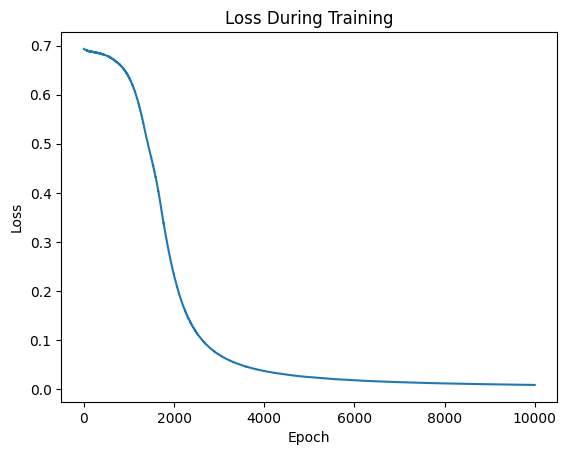

In [40]:
# Plotting the loss
plt.plot(range(epoch_num), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.show()

In [41]:
threshold = 0.5
predictions = xor_model(X) > threshold

print('***************Truth Table***************')
# Print the input-output pairs
for input, pred in zip(X, predictions):
    print(f'Logical values Input: {input.numpy()}, Output: {1 if pred.item() else 0}')

***************Truth Table***************
Logical values Input: [0. 0.], Output: 0
Logical values Input: [0. 1.], Output: 1
Logical values Input: [1. 0.], Output: 1
Logical values Input: [1. 1.], Output: 0


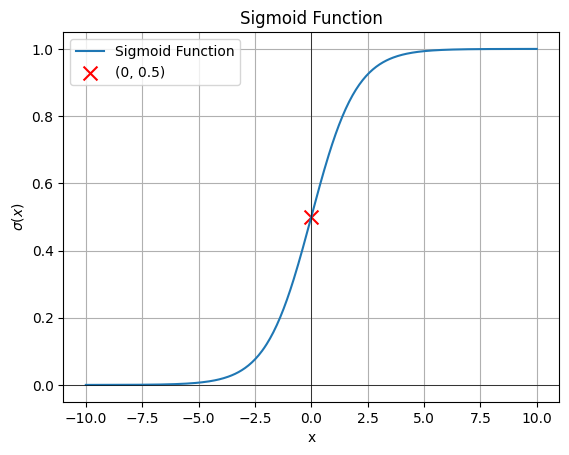

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values
x = np.linspace(-10, 10, 400)

# Compute the corresponding y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Mark the point (0, 0.5) with a red cross
plt.scatter(0, 0.5, color='red', marker='x', s=100, label='(0, 0.5)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


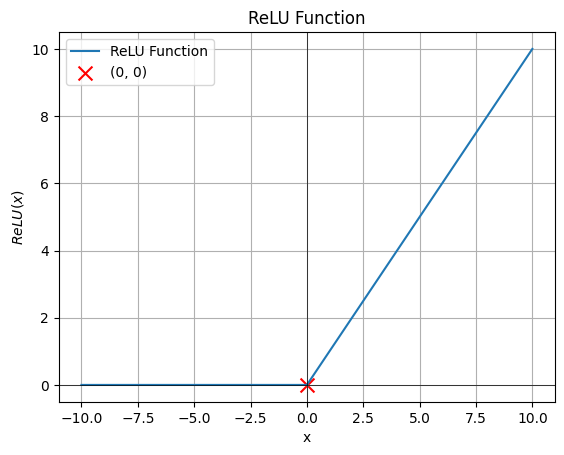

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate an array of x values
x = np.linspace(-10, 10, 400)

# Compute the corresponding y values using the ReLU function
y = relu(x)

# Create the plot
plt.plot(x, y, label='ReLU Function')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('$ReLU(x)$')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Mark the point (0, 0) with a red cross
plt.scatter(0, 0, color='red', marker='x', s=100, label='(0, 0)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

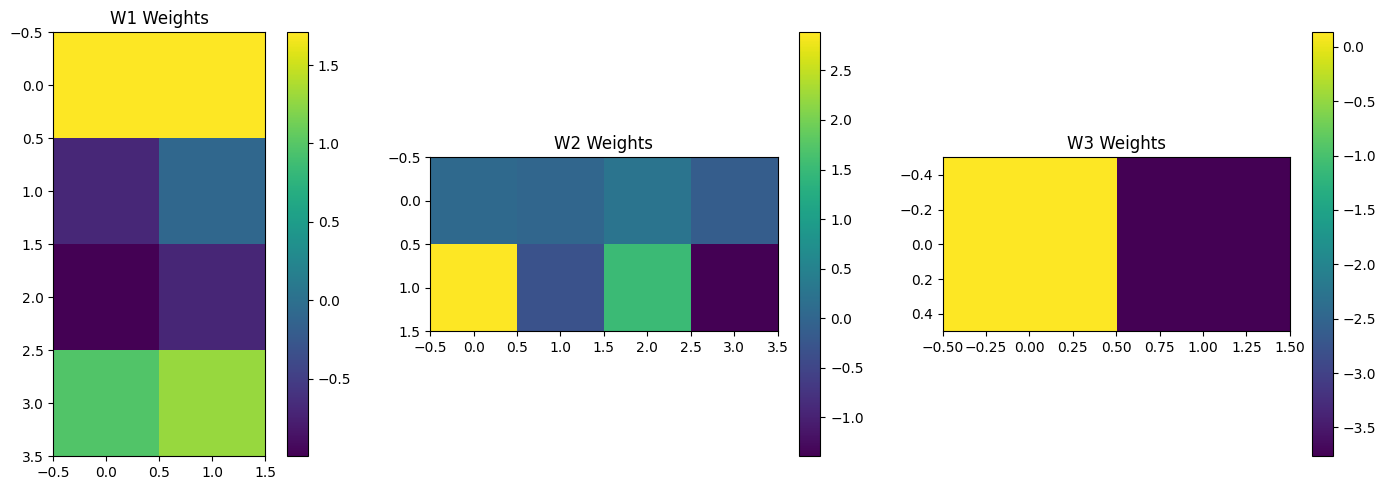

In [11]:
# Visualize weights
def visualize_weights(model):
    plt.figure(figsize=(15, 5))
    
    # Plot W1 weights
    plt.subplot(131)
    plt.imshow(model.W1.weight.detach().numpy())
    plt.title('W1 Weights')
    plt.colorbar()
    
    # Plot W2 weights
    plt.subplot(132)
    plt.imshow(model.W2.weight.detach().numpy())
    plt.title('W2 Weights')
    plt.colorbar()
    
    # Plot W3 weights
    plt.subplot(133)
    plt.imshow(model.W3.weight.detach().numpy())
    plt.title('W3 Weights')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

visualize_weights(xor_model)